In [1]:
import pandas as pd
df = pd.read_csv('bus_trafic_clean.csv')

# Modèle Simple : Régression Linéaire Multiple

In [2]:
df_RLM = df[['ecart_horaire_en_secondes', 'etat_SAE_du_vehicule', 
            'identifiant_SAE_de_ligne', 'coordonnees_GPS_X', 'coordonnees_GPS_Y', 'year', 'month', 'day', 'hours', 'jour_semaine', 'OPINION']]


In [3]:
# One Hot Encoding
df_RLM = pd.get_dummies(df_RLM, columns=[
                        'etat_SAE_du_vehicule', 'identifiant_SAE_de_ligne', 'jour_semaine', 'OPINION'])


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(df_RLM.drop('ecart_horaire_en_secondes', axis=1), df_RLM['ecart_horaire_en_secondes'], test_size = 0.2, random_state = 0)

reg = LinearRegression().fit(Xtrain, Ytrain)


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = reg.predict(Xtest)
# MSE and MAE
print(
    'mean_squared_error : ', mean_squared_error(Ytest, predictions))
print(
    'mean_absolute_error : ', mean_absolute_error(Ytest, predictions))



mean_squared_error :  47338.1920222838
mean_absolute_error :  163.59943023788273


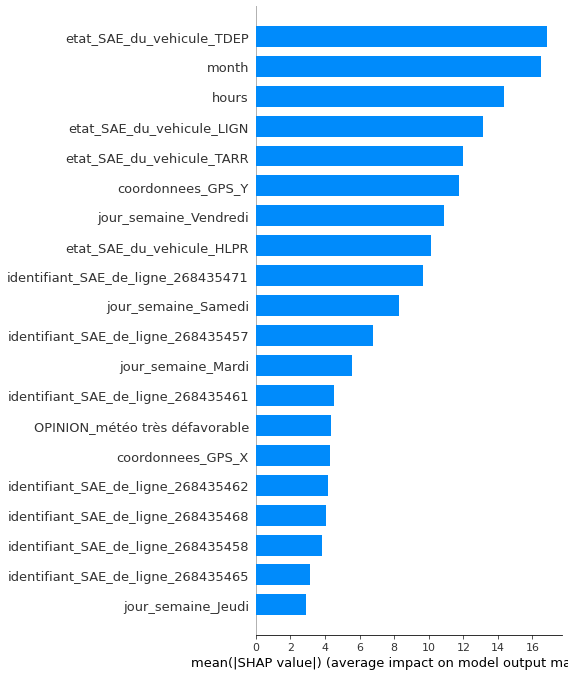

In [6]:
# shap values of reg
import shap

explainer = shap.LinearExplainer(reg, Xtrain)
shapvalues = explainer.shap_values(Xtest)

# plot shap values
shap.summary_plot(shapvalues, Xtest, plot_type="bar")

In [7]:
mean_pred = pd.Series([Ytest.mean()] * len(Ytest))

print(
    'mean_squared_error : ', mean_squared_error(Ytest, mean_pred))
print(
    'mean_absolute_error : ', mean_absolute_error(Ytest, mean_pred))

# MAPE
print(
    'mean_absolute'
)


mean_squared_error :  52697.40308799572
mean_absolute_error :  178.20765016616213


In [8]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

print(
    'mean_absolute_percentage_error', mean_absolute_percentage_error(Ytest, predictions))



mean_absolute_percentage_error 4.525801683964203e+16


# Modèle Compliqué : LSTM